In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("Display.max_row" , None)
pd.set_option("Display.max_columns" , None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# The Aim of this case study is predicted the price of House with respect to given columns

In [4]:
df =  pd.read_csv("J:\\Learn Data Science\\Case Study\\House Price\\House_Price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df['BldgType'].tail(50)

1410      1Fam
1411      1Fam
1412    Duplex
1413      1Fam
1414      1Fam
1415    TwnhsE
1416    2fmCon
1417      1Fam
1418      1Fam
1419      1Fam
1420      1Fam
1421    TwnhsE
1422    TwnhsE
1423      1Fam
1424      1Fam
1425      1Fam
1426      1Fam
1427      1Fam
1428      1Fam
1429      1Fam
1430      1Fam
1431    TwnhsE
1432      1Fam
1433      1Fam
1434      1Fam
1435      1Fam
1436      1Fam
1437      1Fam
1438      1Fam
1439      1Fam
1440      1Fam
1441    TwnhsE
1442      1Fam
1443      1Fam
1444      1Fam
1445      1Fam
1446      1Fam
1447      1Fam
1448      1Fam
1449     Twnhs
1450    Duplex
1451      1Fam
1452    TwnhsE
1453      1Fam
1454      1Fam
1455      1Fam
1456      1Fam
1457      1Fam
1458      1Fam
1459      1Fam
Name: BldgType, dtype: object

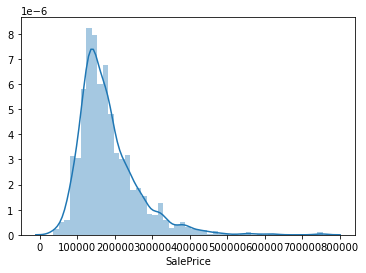

In [8]:
# Let's plot sale price column in graph_
_= sns.distplot(df['SalePrice'])

In [9]:
# Calculate Number of null values
total = df.isnull().sum().sort_values(ascending = False)

In [10]:
total


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [11]:
percent = df.isnull().sum() / df.shape[0]
percent

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [12]:
percent.sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

In [13]:
miss_data = pd.concat([total,percent] , axis= 1 , keys = ['total','percent'])
miss_data

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
miss_data.sort_index()

,total,percent
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
3SsnPorch,0,0.000000
Alley,1369,0.937671
BedroomAbvGr,0,0.000000
BldgType,0,0.000000
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinSF1,0,0.000000
BsmtFinSF2,0,0.000000


In [15]:
null_has_meaning=["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                 "BsmtQual","Fence","FireplaceQu","GarageCond","GarageFinish","GarageQual","GarageType","PoolQC","MiscFeature"]

In [16]:
for i in null_has_meaning:
    df[i].fillna("None",inplace=True)
    

In [17]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
miss_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
miss_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [18]:
df.drop('LotFrontage', inplace = True,axis = 1)

In [19]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
miss_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
miss_data.head(20)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


In [20]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

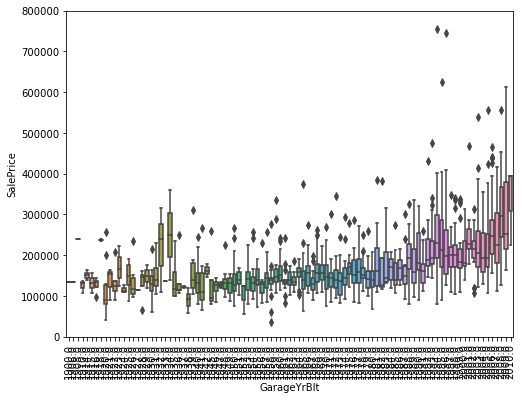

In [21]:
var="GarageYrBlt"
data=pd.concat([df["SalePrice"],df[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

In [22]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
miss_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
miss_data.head(20)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


In [23]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(),inplace=True)
df["MasVnrType"].fillna("None",inplace=True)

In [24]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
miss_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
miss_data.head(20)

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [25]:
types_train = df.dtypes
types_train

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [26]:
num_train = types_train[(types_train == "int64") | (types_train == "float64")]

In [27]:
num_train

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [28]:
cat_train = types_train[(types_train == "object")]
cat_train

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [29]:
# Let's make data frame
pd.DataFrame(types_train).reset_index().set_index(0).head()

,index
0,
int64,Id
int64,MSSubClass
object,MSZoning
int64,LotArea
object,Street


In [30]:
pd.DataFrame(types_train)[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [31]:
types_train.value_counts() # Anoher way

object     43
int64      35
float64     2
dtype: int64

In [32]:
# Let's make the num_train into list

numrical_values_count = list(num_train.index)
numrical_values_count

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [33]:
categorical_value_train = list(cat_train.index)

In [34]:
categorical_value_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

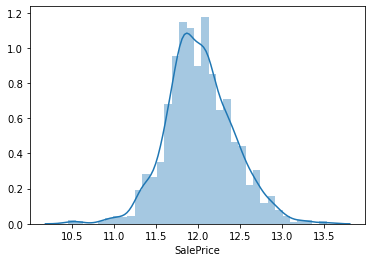

In [35]:
# let's plot graph
_=sns.distplot(np.log(df['SalePrice']))

In [36]:
df["TransformPrice"] = np.log(df["SalePrice"])

In [37]:
df["TransformPrice"].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformPrice, dtype: float64

In [38]:
# How set work
set(df['MSZoning'])    # It will show the set of unique value

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [39]:
for i in categorical_value_train:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j,i] = feature_list.index(j)

In [40]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformPrice
1455,1456,60,0,7917,0,1,1,3,0,4,1,3,5,5,1,6,6,5,1999,2000,0,3,5,7,0,0.0,3,1,0,4,2,3,2,0,2,0,953,953,0,3,0,1,953,694,0,1647,0,0,2,1,3,1,3,7,4,1,2,1,1999.0,0,2,460,2,2,1,0,40,0,0,0,0,0,0,0,0,8,2007,8,0,175000,12.072541
1456,1457,20,0,13175,0,1,1,3,0,4,1,11,5,5,1,3,6,6,1978,1988,0,3,14,15,3,119.0,3,1,3,4,2,3,5,790,1,163,589,1542,0,1,0,1,2073,0,0,2073,1,0,2,0,3,1,3,7,6,2,2,1,1978.0,1,2,500,2,2,1,349,0,0,0,0,0,0,4,0,0,2,2010,8,0,210000,12.254863
1457,1458,70,0,9042,0,1,1,3,0,4,1,23,5,5,1,6,7,9,1941,2006,0,3,12,4,0,0.0,1,4,1,2,4,3,3,275,2,0,877,1152,0,3,0,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,4,2,5,1,1941.0,0,1,252,2,2,1,0,60,0,0,0,0,0,2,4,2500,5,2010,8,0,266500,12.493130
1458,1459,20,0,9717,0,1,1,3,0,4,1,22,5,5,1,3,5,6,1950,1996,1,3,8,10,0,0.0,3,1,3,2,2,2,3,49,1,1029,0,1078,0,4,0,4,1078,0,0,1078,1,0,1,0,2,1,2,5,4,0,0,1,1950.0,1,1,240,2,2,1,366,0,112,0,0,0,0,0,0,0,4,2010,8,0,142125,11.864462
1459,1460,20,0,9937,0,1,1,3,0,4,1,2,5,5,1,3,5,6,1965,1965,0,3,4,6,0,0.0,2,1,3,2,2,3,4,830,6,290,136,1256,0,4,0,1,1256,0,0,1256,1,0,1,1,3,1,3,6,4,0,0,1,1965.0,3,1,276,2,2,1,736,68,0,0,0,0,0,0,0,0,6,2008,8,0,147500,11.901583


# Let's do Features

In [41]:
X = df.drop(["Id","SalePrice","TransformPrice"],axis = 1)
Y = df["TransformPrice"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 ,random_state = 100)

In [44]:
params = {"alpha" : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso ,param_grid=params,cv = folds,
                       scoring="neg_mean_absolute_error", return_train_score=True,verbose = 1)

In [47]:
model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
cv_result = pd.DataFrame(model_cv.cv_results_)

In [49]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104847,0.060846,0.016546,0.002635,0.0001,{'alpha': 0.0001},-0.092417,-0.110570,-0.096949,-0.088292,-0.095701,-0.096785,0.007516,2,-0.084463,-0.082880,-0.080860,-0.086990,-0.084978,-0.084034,0.002060
1,0.053950,0.005544,0.018151,0.004654,0.001,{'alpha': 0.001},-0.091119,-0.109761,-0.098907,-0.088017,-0.092262,-0.096013,0.007737,1,-0.086165,-0.082639,-0.081310,-0.087479,-0.086161,-0.084751,0.002355
2,0.045628,0.004650,0.014240,0.003335,0.01,{'alpha': 0.01},-0.099773,-0.103318,-0.103924,-0.089691,-0.092794,-0.097900,0.005703,3,-0.095214,-0.085477,-0.091240,-0.097461,-0.095539,-0.092986,0.004265
3,0.092961,0.020056,0.014641,0.001965,0.05,{'alpha': 0.05},-0.103412,-0.116386,-0.118495,-0.101167,-0.104147,-0.108721,0.007217,4,-0.105587,-0.099553,-0.101591,-0.107450,-0.106033,-0.104043,0.002971
4,0.070497,0.001809,0.011533,0.002958,0.1,{'alpha': 0.1},-0.110019,-0.123667,-0.126908,-0.108161,-0.111608,-0.116073,0.007671,5,-0.115212,-0.104348,-0.108441,-0.116136,-0.115183,-0.111864,0.004662
5,0.059568,0.007981,0.011432,0.003902,0.2,{'alpha': 0.2},-0.109104,-0.125128,-0.126191,-0.109167,-0.111775,-0.116273,0.007732,6,-0.115295,-0.105040,-0.109686,-0.115857,-0.115837,-0.112343,0.004328
6,0.054753,0.007486,0.012034,0.004001,0.3,{'alpha': 0.3},-0.109412,-0.126124,-0.126491,-0.111376,-0.112481,-0.117177,0.007521,7,-0.116713,-0.106051,-0.111503,-0.116703,-0.117441,-0.113682,0.004368
7,0.045727,0.005909,0.007823,0.001508,0.4,{'alpha': 0.4},-0.109642,-0.126515,-0.127033,-0.111564,-0.113065,-0.117564,0.007600,8,-0.117115,-0.106805,-0.112012,-0.117223,-0.118040,-0.114239,0.004286
8,0.040212,0.007000,0.006820,0.001213,0.5,{'alpha': 0.5},-0.110337,-0.127328,-0.127835,-0.111483,-0.113849,-0.118166,0.007772,9,-0.117875,-0.107701,-0.112750,-0.117774,-0.118776,-0.114975,0.004209
9,0.036201,0.006297,0.006921,0.001537,0.6,{'alpha': 0.6},-0.111254,-0.128441,-0.129076,-0.111511,-0.114643,-0.118985,0.008071,10,-0.118685,-0.108959,-0.113593,-0.118597,-0.119552,-0.115877,0.004047


In [50]:
cv_result.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [51]:
cv_result['param_alpha'] = cv_result["param_alpha"].astype('float32')

In [52]:
cv_result.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float32
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

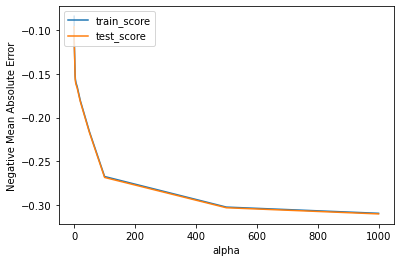

In [53]:
plt.plot(cv_result["param_alpha"],cv_result["mean_train_score"])
plt.plot(cv_result["param_alpha"],cv_result["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"],loc="upper left")
plt.show()

In [55]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,Y_train)

Lasso(alpha=50)

In [58]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.14430884e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.19834453e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.66666353e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [59]:
# Let's Make Ridge Model

In [62]:
ridge =  Ridge()
flods = 5
Model_cv = GridSearchCV(estimator=ridge , param_grid = params ,scoring = "neg_mean_absolute_error",
                       return_train_score = True,cv= folds,verbose = 1)
Model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_result = pd.DataFrame(Model_cv.cv_results_)

In [70]:
cv_result.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float64
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [69]:
cv_result["param_alpha"] = cv_result['param_alpha'].astype('float64')

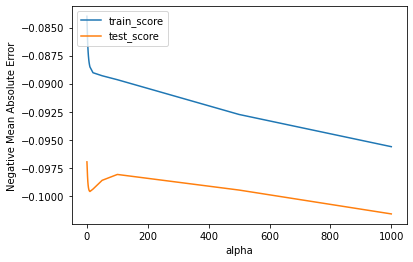

In [71]:
plt.plot(cv_result["param_alpha"],cv_result["mean_train_score"])
plt.plot(cv_result["param_alpha"],cv_result["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"],loc="upper left")
plt.show()

In [72]:
alpha = 10
ridge = Ridge(alpha =alpha)
ridge.fit(X_train,Y_train)

Ridge(alpha=10)

In [73]:
ridge.coef_

array([-4.82219239e-04, -8.89287158e-03,  2.00447449e-06, -5.05499176e-02,
       -4.80813745e-02,  6.51773760e-03, -3.19947730e-03, -1.42610730e-02,
       -1.98033530e-03, -2.37129585e-02,  2.56386186e-03,  7.87881413e-04,
        4.65129721e-02, -8.69554671e-04, -6.53223104e-03,  7.36115961e-02,
        4.14950211e-02,  2.26832649e-03,  1.20911342e-03,  1.15284998e-02,
        1.71709322e-02, -2.39932687e-03,  3.36106828e-03, -4.56507864e-03,
        3.56149364e-05, -3.42828465e-03, -9.00914779e-03, -1.43945143e-02,
       -8.11660936e-04,  5.80994574e-03,  1.54310609e-03,  4.01014216e-03,
        2.30487632e-05, -6.27296641e-04,  7.48847427e-06, -2.07193878e-06,
        2.84653018e-05, -3.29743632e-03,  6.43234838e-03, -2.63938331e-02,
        6.10003271e-04,  7.71258148e-05,  5.28949871e-05, -9.78478065e-06,
        1.20236012e-04,  6.74121872e-02,  1.35128303e-02,  4.06738962e-02,
        2.63563085e-02,  9.52708578e-03, -3.25525690e-02, -1.20283421e-02,
        1.22105012e-02,  